In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import common_utils as cu

In [2]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [3]:
df_train_pos = df_train[df_train.target == 1]
df_train_neg = df_train[df_train.target == 0]
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [5]:
uniq_keywords_train = df_train.keyword.unique()
uniq_keywords_test = df_test.keyword.unique()
num_uniq_keywords_train = len(uniq_keywords_train)
num_uniq_keywords_test = len(uniq_keywords_test)
print(f"No. of unique keywords in train set = {num_uniq_keywords_train} "+ 
      f"and test set = {num_uniq_keywords_test}")
diff = set(uniq_keywords_train).difference(set(uniq_keywords_test))      
diff

No. of unique keywords in train set = 222 and test set = 222


set()

Exactly the same keywords are present both in train and test sets

In [6]:
df_train.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [7]:
def col_null_stats(col):
    train_col_null_count = np.sum(df_train[col].isnull())
    test_col_null_count = np.sum(df_test[col].isnull())
    pct_col_null_train = (len(df_train) - train_col_null_count) / len(df_train)
    pct_col_null_test = (len(df_test) - test_col_null_count) / len(df_test)
    return round(pct_col_null_train, 4), round(pct_col_null_test, 4)

In [8]:
pct_keyw_null_train, pct_keyw_null_test  = col_null_stats("keyword")
pct_loc_null_train, pct_loc_null_test  = col_null_stats("location")
print(f"Percentage of samples with not null keyword in "+ 
      f"train = {pct_keyw_null_train}, test = {pct_keyw_null_test}")
print(f"Percentage of samples with not null location in "+ 
      f"train = {pct_loc_null_train}, test = {pct_loc_null_test}")      

Percentage of samples with not null keyword in train = 0.992, test = 0.992
Percentage of samples with not null location in train = 0.6673, test = 0.6614


Approx same percentage of samples in train and test with keywords and location missing. 

In [9]:
df_train["keyword"] = df_train["keyword"].fillna("no_keyword")
df_test["keyword"] = df_test["keyword"].fillna("no_keyword")
df_train["location"] = df_train["location"].fillna("no_location")
df_test["location"] = df_test["location"].fillna("no_location")


In [10]:
pos_keyw_freq = df_train_pos["keyword"].value_counts()
neg_keyw_freq = df_train_neg["keyword"].value_counts()
pos_keyw_uniq = set(pos_keyw_freq.keys())
neg_keyw_uniq = set(neg_keyw_freq.keys())
pos_to_neg_diff = pos_keyw_uniq.difference(neg_keyw_uniq)
neg_to_pos_diff = neg_keyw_uniq.difference(pos_keyw_uniq)
print(pos_to_neg_diff)
print(neg_to_pos_diff)

{'derailment', 'debris', 'wreckage'}
{'aftershock'}


In [11]:
keyw_pos_probab_dict = {}
for key in pos_keyw_uniq:
    if key in pos_to_neg_diff:
        keyw_pos_probab_dict[key] = 0.0
    else:
        keyw_pos_probab_dict[key] = pos_keyw_freq[key] / (pos_keyw_freq[key] + neg_keyw_freq[key])

keyw_pos_prob = [[value, key] for key, value in keyw_pos_probab_dict.items()]
keyw_pos_prob.sort(reverse=True, key=lambda k: k[0])
keyw_pos_prob

[[0.975, 'outbreak'],
 [0.9736842105263158, 'typhoon'],
 [0.9736842105263158, 'oil%20spill'],
 [0.9696969696969697, 'suicide%20bombing'],
 [0.967741935483871, 'suicide%20bomber'],
 [0.9310344827586207, 'bombing'],
 [0.9142857142857143, 'rescuers'],
 [0.9142857142857143, 'suicide%20bomb'],
 [0.9117647058823529, 'nuclear%20disaster'],
 [0.8888888888888888, 'evacuated'],
 [0.8857142857142857, 'razed'],
 [0.8787878787878788, 'wildfire'],
 [0.8709677419354839, 'wild%20fires'],
 [0.8571428571428571, 'airplane%20accident'],
 [0.8484848484848485, 'mass%20murder'],
 [0.8484848484848485, 'buildings%20on%20fire'],
 [0.84375, 'forest%20fires'],
 [0.8285714285714286, 'bridge%20collapse'],
 [0.8, 'drought'],
 [0.8, 'casualties'],
 [0.7894736842105263, 'forest%20fire'],
 [0.7878787878787878, 'violent%20storm'],
 [0.7878787878787878, 'thunderstorm'],
 [0.7777777777777778, 'evacuation'],
 [0.7692307692307693, 'earthquake'],
 [0.7567567567567568, 'sandstorm'],
 [0.75, 'hailstorm'],
 [0.75, 'devastation'

In [12]:
pd.set_option('display.max_colwidth', None)
df_train[df_train.keyword == "casualties"].head(20)

,id,keyword,location,text,target
1392,2009,casualties,indiana,That triumphant moment when you cook up two eggs over easy with no yolk casualties ?? http://t.co/fQJ5Aga1pd,0
1393,2010,casualties,no_location,??\nWarfighting Robots Could Reduce Civilian Casualties So Calling for a Ban Now Is Premature - IEEE Spectrum http://t.co/TzR58B86qz,1
1394,2012,casualties,no_location,Another movie theater attack..close to home this time. Thankful for no casualties. Life will go on because we cannot allow evil to win!,1
1395,2014,casualties,Philippines,Civilian casualties rise as Afghan war intensifies in 2015-- http://t.co/NnylXhInPx,1
1396,2015,casualties,no_location,Afghan conflict sees 'sharp rise' in female casualties http://t.co/4hcYwRWN6L http://t.co/2TwXZ6vxbx,1
1397,2016,casualties,"Bronx, New York",Warfighting Robots Could Reduce Civilian Casualties So Calling for a... http://t.co/9DVU1RidZ3,1
1398,2017,casualties,Canadian bread,@LibertarianLuke I'm all for that to be honest. If people want to go on a rampage let them use their own hands and feet. No casualties.,0
1399,2019,casualties,"Phoenix, AZ",Afghanistan: U.N. Reports 'Record-High Levels' of Civilian Casualties\n \nIn news from Afghanistan the United... http://t.co/YMcZyVKfmE,1
1400,2020,casualties,Le Moyne '16,Need to stop bottling things up because when everything eventually explodes the casualties just keep getting higher and higher,1
1401,2022,casualties,no_location,Countless Casualties All Across The Globe War Being Orchestrated On All The Corners Of The Planet [On All Levels] http://t.co/G1BWL3DQQK,1


In [22]:
def get_word_count_freq(df):
    df["word_count"] = df["text"].apply(lambda tweet:len(tweet.split()))
    word_count_freq = df["word_count"].value_counts()
    word_count_freq = [[key, value] for key, value in word_count_freq.items()]
    word_count_freq.sort(key=lambda k: k[0])
    word_count_freq = np.array(word_count_freq)
    return word_count_freq

train_pos_wc_freq = get_word_count_freq(df_train_pos)    
train_neg_wc_freq = get_word_count_freq(df_train_neg)    

<ipython-input-22-b6a56467d699>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["word_count"] = df["text"].apply(lambda tweet:len(tweet.split()))


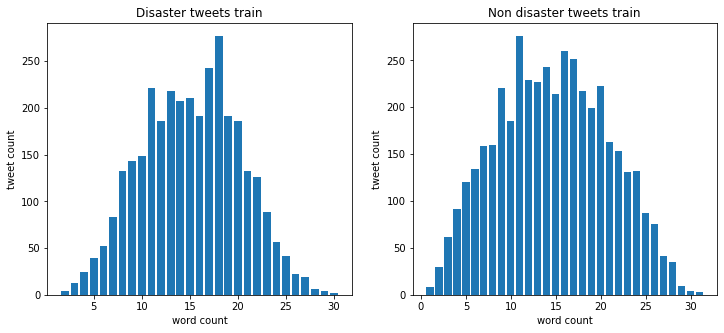

In [34]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

def plot_bar(wc_freq, ax, title):
    word_count = wc_freq[:, 0]
    tweet_count = wc_freq[:, 1]    
    ax.bar(word_count, tweet_count)
    ax.set_ylabel("tweet count")
    ax.set_xlabel("word count")
    ax.set_title(title)    

plot_bar(train_pos_wc_freq, ax1, "Disaster tweets train")    
plot_bar(train_neg_wc_freq, ax2, "Non disaster tweets train")    
